## Exploring idea: when does correlation show similarity?


### Ejemplos básicos: transformaciones lineales


Correlación X, 2X:	 1.0

Correlación X, X+1:	 1.0

Correlación X, 3X:	 1.0




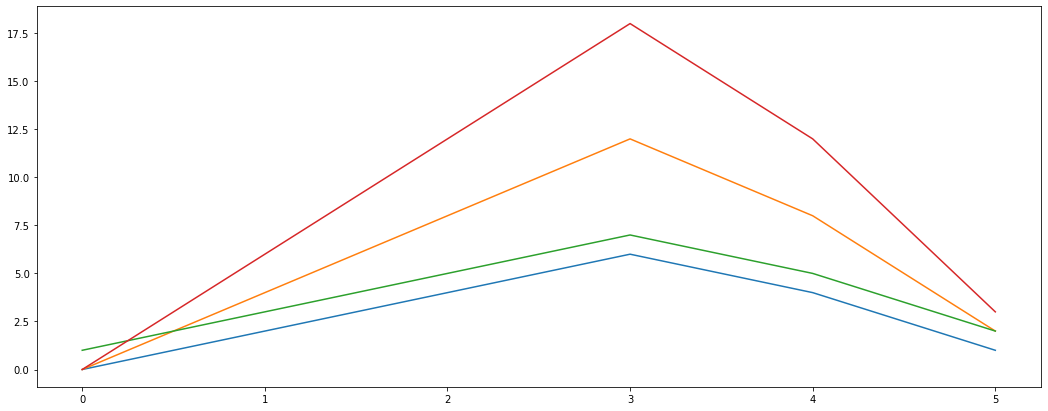

In [225]:
domain = range(6)
x = [0,2,4,6,4,1]    # X
y1 = [0,4,8,12,8,2]   # 2X
y2 =[1,3,5,7,5,2]     # X+1
y3 = [0,6,12,18,12,3] # 3X

plt.figure(figsize=(18, 7))
plt.plot(domain, x, label = "X")
plt.plot(domain, y1, label = "2X")
plt.plot(domain, y2, label = "X+1")
plt.plot(domain, y3, label = "3X")

print("\nCorrelación X, 2X:\t", np.corrcoef(x, y1)[0][1].round(5))
print("\nCorrelación X, X+1:\t", np.corrcoef(x, y2)[0][1].round(5))
print("\nCorrelación X, 3X:\t", np.corrcoef(x, y3)[0][1].round(5))
print("\n")


### Correlación entre dos polinomios. Distinto grado, mismo mínimo.


Correlación X, X^2:	 1.0




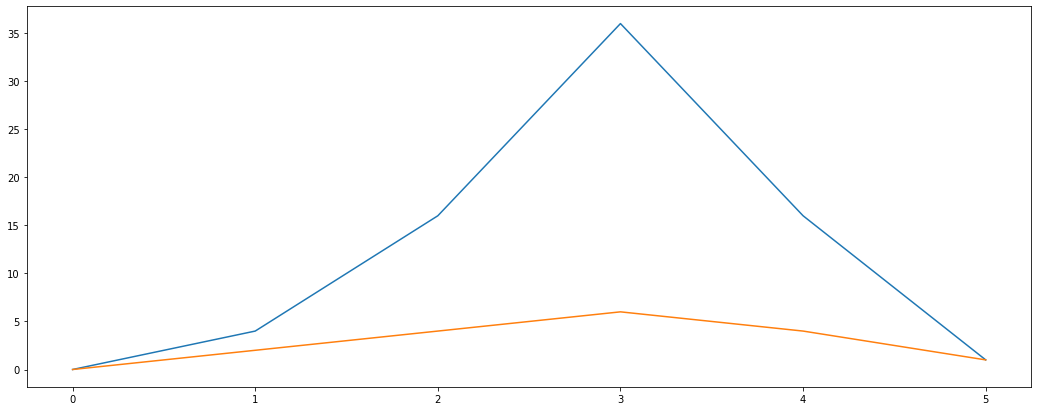

In [226]:
y4 = [0,4,16,36,16,1] # X^2
plt.figure(figsize=(18, 7))
plt.plot(domain, y4, label = "X^2")
plt.plot(domain, x, label = "X")

print("\nCorrelación X, X^2:\t", np.corrcoef(x, y1)[0][1].round(5))
print("\n")


### Correlación: sinusoidal vs parábola
Alta similitud entre un trocito de seno y una parábola que tienen el mínimo en el mismo punto



Correlación parábola, sinusoide:	 0.9983




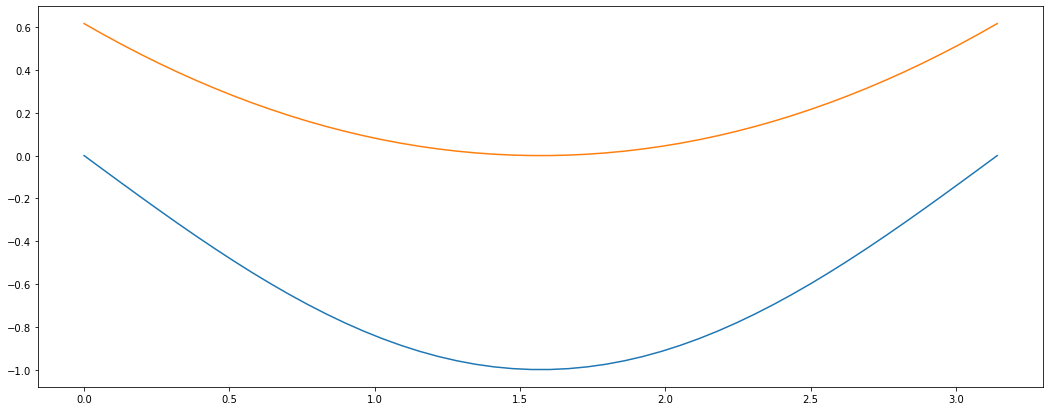

In [228]:
x = np.linspace(0, np.pi, 50)
y1 = -1*np.sin(x)
y2 = (np.power(x-np.pi/2,2))/4
plt.figure(figsize=(18, 7))
plt.plot(x, y1)
plt.plot(x, y2)

print("\nCorrelación parábola, sinusoide:\t",np.corrcoef(y1, y2)[0][1].round(5))
print("\n")

### Parábola vs parábola-que-es-sinusoidal-cuando-te-acercas 


Correlación parábola, y parñabolasinusoidal:	 0.99991




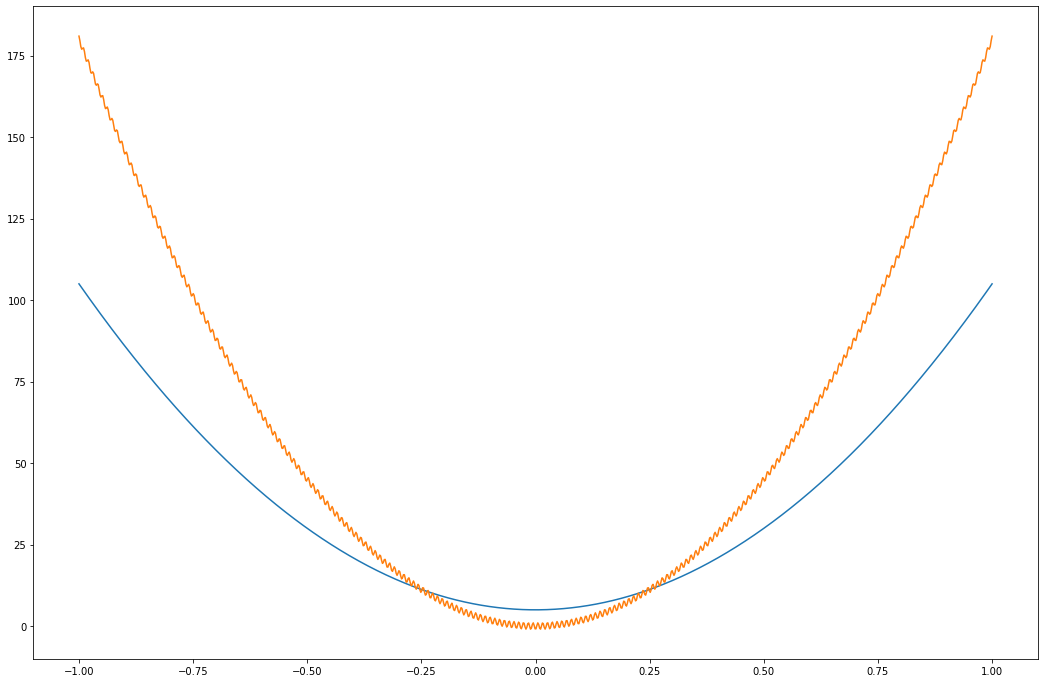

In [230]:
# weird function definition
scale = lambda x, a, b, a2, b2: (x-a)*(b2-a2)/(b-a)+a2
scale_from_unity = lambda x, a, b: scale(x, -1,1,a,b)
def griewank(x):
    #domain is [-600,600]
    x = scale_from_unity(x,-600,600)
    return x**2/2000-np.cos(x)

x = np.linspace(-1, 1, 1000)
y1 = np.power(x, 2)*100+5
y2 = griewank(x)

plt.figure(figsize=(18, 12))
plt.plot(x, y1)
plt.plot(x, y2)


print("\nCorrelación parábola, y parñabolasinusoidal:\t",np.corrcoef(y1, y2)[0][1].round(5))
print("\n")

### Correlación vs transformaciones lineales

Dos funciones con correlación alta ($0.89$) pueden no ser aproximables con una transformación lineal.

Ejemplo: $x^2$, $x^6$

El gráfico muestra cómo la transformación lineal de $x^2$ que minimiza el error cuadrático al compararla con $x^6$ (azul), está lejos de parecerse a $x^6$ (amarillo) 


Correlación x^2, x^6:	 0.89578




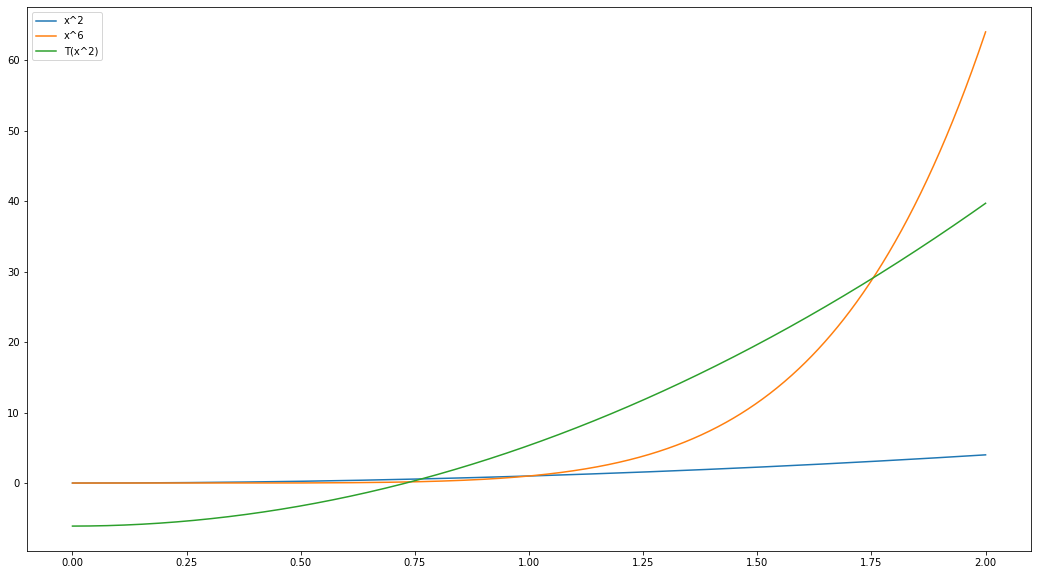

In [234]:
# Transformations
from scipy.optimize import curve_fit
def line(x, a, b):
    return a * x + b
#finds best a, b such that gp2 = a*gp1 + b
def line_transform(m1, m2, X):
    popt, pcov = curve_fit(line, m1, m2)
    #print(popt)
    Tm1 = line(m1, popt[0], popt[1])
    return Tm1

x = np.linspace(0,2, 1000)
y1 = np.power(x,2)
y2 = np.power(x,6)


Ty1 = line_transform(y1,y2,x)

plt.figure(figsize=(18, 10))
plt.plot(x, y1, label = "x^2")
plt.plot(x, y2, label = "x^6")
plt.plot(x, Ty1, label = "T(x^2)")
plt.legend()


print("\nCorrelación x^2, x^6:\t",np.corrcoef(y1, y2)[0][1].round(5))
print("\n")

### Transformaciones lineales vs correlación 2:

Dos funciones con correlación alta ($0.81$) pueden no ser aproximables con una transformación lineal debido a que sus velocidades de crecimiento son muy distintas.

Ejemplo:  $x^2$ ,  $e^x$

El gráfico muestra cómo la transformación lineal de  $x^2$  que minimiza el error cuadrático al compararla con  $e^x$  (azul), está lejos de parecerse a  $e^x$  (amarillo)


Correlación x^2, e^x:	 0.81603




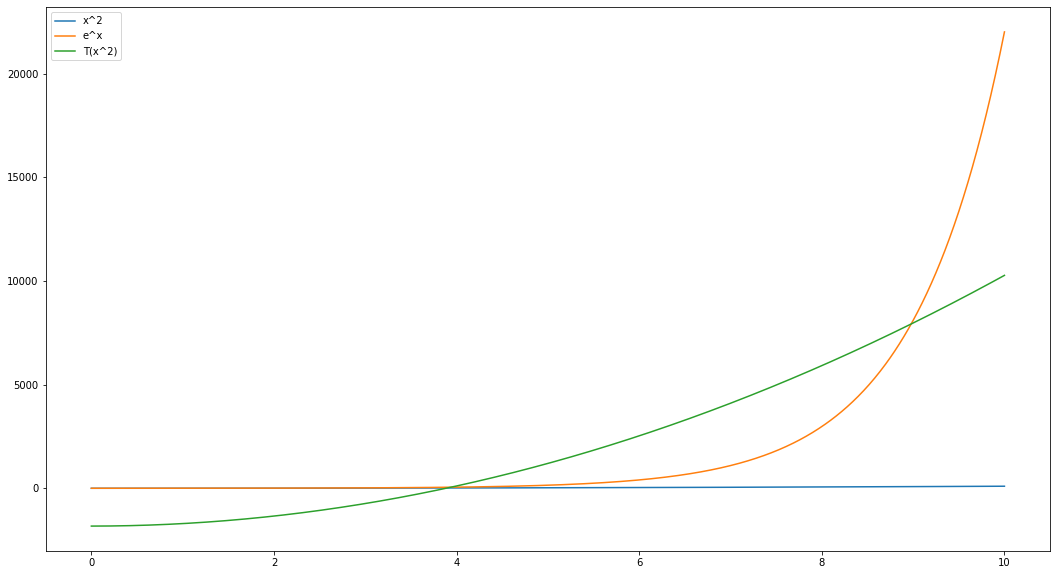

In [235]:
x = np.linspace(0,10, 1000)
y1 = np.power(x,2)
y2 = np.exp(x)


Ty1 = line_transform(y1,y2,x)

plt.figure(figsize=(18, 10))
plt.plot(x, y1, label = "x^2")
plt.plot(x, y2, label = "e^x")
plt.plot(x, Ty1, label = "T(x^2)")
plt.legend()

print("\nCorrelación x^2, e^x:\t",np.corrcoef(y1, y2)[0][1].round(5))
print("\n")

### Última prueba por ahora: 3 funciones raras que comparten mínimo


Correlación mich(m = 10), mich(m = 50):	 0.85432

Correlación mich(m = 50), mich(m = 100):	 0.96993

Correlación mich(m = 10), mich(m = 100):	 0.74557




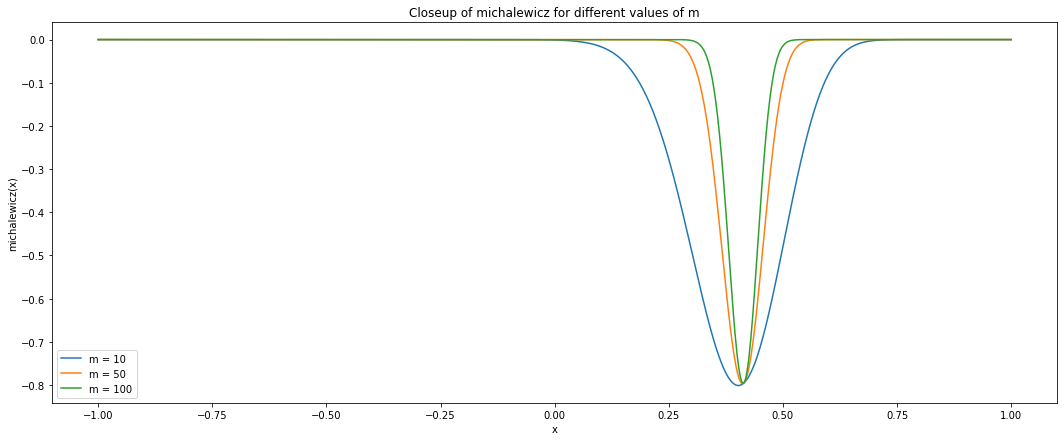

In [240]:
# m is steepness (de las "fosas"). m = 10 is advised
def michalewicz (x,m=10):
    #domain is [0, pi]
    x = scale_from_unity(x,0,np.pi)
    return -np.sin(x)*np.power((np.sin(x**2/np.pi)), 2*m)
michalewicz.__name__ = "mich"

X = np.linspace(-1, 1, 1000)
y1 = michalewicz(X)
y2 = michalewicz(X, 50)
y3 = michalewicz(X, 100)
plt.figure(figsize=(18, 7))
plt.plot(X, y1)
plt.plot(X, y2)
plt.plot(X, y3)
# Annotate plot
plt.xlabel("x"), plt.ylabel("michalewicz(x)") 
plt.title("Closeup of michalewicz")
plt.title("Closeup of michalewicz for different values of m")
plt.legend(labels = ["m = 10", "m = 50", "m = 100"])


print("\nCorrelación mich(m = 10), mich(m = 50):\t",np.corrcoef(y1, y2)[0][1].round(5))
print("\nCorrelación mich(m = 50), mich(m = 100):\t",np.corrcoef(y2, y3)[0][1].round(5))
print("\nCorrelación mich(m = 10), mich(m = 100):\t",np.corrcoef(y1, y3)[0][1].round(5))
print("\n")